# Lab: Justice

We plan on continuing to explore simulation in Python this week, however, this time, we are going to simulate some real-world events that have actually happened in the past.  The goal is for you to see how we can use data science to think about issues of equity and social justice.  As usual, in addition to coding, we want you to get practice having discussions about the data science you are doing and think about how data science can be a useful tool that can help you in your future job and as a citizen.

**IMPORTANT NOTE**: In this lab, it's *very* important that you read through the text carefully. Understanding the context is crucial for success in lab_justice :)

Let’s get started!

# PRE-LAB SURVEY

We are doing a pre and post lab survey this week! Please complete this survey BEFORE you start the lab to get +2 extra credit points! Who doesn't want extra credit?!  This will help us make the labs better and should take about 5 minutes :) Click the link below to access the survey.

[hhttps://forms.gle/8bTofuBPfUYpyWXM8](https://forms.gle/8bTofuBPfUYpyWXM8)

## Group
Edit the next Python cell to add information about who you're working within your lab section.

In [24]:
# First, write down the names of your TAs and CAs
ta_name = "Heman"
ca1_name = ""
ca2_name = ""
ca3_name = ""

# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = ""
partner1_netid = ""
partner1_major = ""

partner2_name = ""
partner2_netid = ""
partner2_major = ""

partner3_name = ""
partner3_netid = ""
partner3_major = ""

## Table of Contents <a id='toc'></a>

**Use the Outline view (View > Command Palette > Type "outline") for navigation.**

* Pre-Lab Survey (+2 EC)
* Puzzle 1
    * Puzzle 1.1
    * Puzzle 1.2
    * Puzzle 1.3
    * Puzzle 1.4
    * Puzzle 1.5
    * Puzzle 1.6
    * Puzzle 1.7
    * Puzzle 1.8
    * Puzzle 1.9
* Puzzle 2
    * Puzzle 2.1
    * Puzzle 2.2
    * Puzzle 2.3
    * Puzzle 2.4
    * Puzzle 2.5
* Puzzle 3
* Post-Lab Survey (+2 EC)

# Puzzle 1: Jury Selection + Simulation

The Sixth Amendment to the U.S. Constitution provides the right to an “impartial jury” in criminal prosecutions, but what exactly does this mean? The Supreme Court has said that juries must be drawn from a representative cross-section of the community. In other words, juries should be randomly selected from the eligible population. However, there are many instances in history where it doesn’t seem like this was the case.

Take for example, the case of Berghuis v. Smith.  In 1993, Smith (a black man) was convicted of second-degree murder by an all-white jury and sentenced to life in prison. The jury was selected from a panel of about 100 randomly selected people. Only 3 of them were Black and none of those three made it into the final 37 considered for Smith’s trial. The county population was approximately 8 percent Black at the time of the trial.  Remember, jury panels are supposed to be selected at random from the eligible population.

## Puzzle 1.1: Your Initial Thoughts
❓ **Group Discussion Question** ❓ Because 8% of the eligible population was Black, 3 black people on a panel of 100 might seem low.  Does this difference (8% vs. 3%) seem big to you? Do you think this could be due to chance?

❓ **Individual Reflection Question** ❓  Write a few sentences summarizing what your group members said during your discussion.  Did people think this difference could have been due to chance or not?

Yes it does seem low. The fact that only 3 of the people on the panel were black in a county where 8% of the population is black seems like a large disparity. 

This case was appealed and sent to the Supreme Court.  Some people claimed that the overall percentage disparity (between 8% and 3%) was small and reflected no attempt to include or exclude a specified number of black people from the jury." They claimed this "small" difference could simply be due to chance.  Critics and Smith claimed that the system of jury selection caused the lack of fair and reasonable representation of black people on the jury.

## Puzzle 1.2: Writing a Function

Let’s do a simulation in Python to understand what’s going on.  Write a simulation to show the expected distribution.  Remember, from the case: we are trying to see if the difference between 8% and 3% is small and reflects no attempt to include or exclude a specified number of African Americans."  In other words, **we want to write a function to randomly sample 100 people from a population that has 8% Black people.**  The function should return the number of Black people in each jury.  We can do this multiple times and see how rare it is to get 3 or fewer people in the jury.

In [41]:
## Import pandas and random
import pandas as pd
import random

In [42]:
## Write your function to simulate selecting a jury panel of size 100 from a population
## with 8% Black people that counts the number of Black people selecte

def simulateJuryPanel():
  count = 0
  for i in range(100):
    jury = random.randint(1,100)
    if jury <= 8:
      count += 1
  return count

In [43]:
simulateJuryPanel()

10

## Puzzle 1.3: Storing the Results in a Data Frame

Store the results in a dataframe so we can analyze this.  Let’s start by doing this simulation 100 times.  In other words, we are simulating picking 100 juries.  Store the results in a dataframe called `df`. 

**Simulate this 100 times and store the results in a dataframe. The variable or column in the dataframe should be named `panel`**

In [44]:
## Write your simulation here

data = []
for i in range(100):
    jury = simulateJuryPanel()
    d = {"panel": jury}
    data.append(d)
df =  pd.DataFrame(data)

df



panel
0       8
1       7
2       5
3       6
4       8
..    ...
95      7
96      8
97     15
98     12
99      8

[100 rows x 1 columns]

In [45]:
## == TEST CASES for Puzzle 1.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(df) == 100), "You need to apply your function to your dataframe"
assert((df["panel"].mean() >5) & (df["panel"].mean() <10)), "You may not have properly defined your simulation"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.4: Create a histogram of your results

Create a histogram of the results.

In [46]:
## Create your histogram here
df.hist()

array([[<AxesSubplot:title={'center':'panel'}>]], dtype=object)

## Puzzle 1.5: Reflection

❓ **Group Discussion Question** ❓ Interpret the results of your histogram. How does your histogram provide evidence for or against the claim that the jury was not fair?  What does this tell us about this case?  Do you think this could have happened by chance?  If so, why? If not, why did some people claim it did?

❓ **Individual Reflection Question** ❓ Write down the most interesting part of your group discussion.

The histogram shows that there is a low probality that there would be 3 black jurors or less but it does not mean its imposible. It could have been the case that this happened by chance.

## Puzzle 1.6: What we observed vs. what we expected!

❓ **Individual Reflection Question** ❓ What was the expected value for the number of Black people in the jury?  Enter your answer below.  

6

Next, calculate the mean of the dataframe that you created from the simulation.

In [47]:
## Calculate the average number of Black people in the jury

mean= df["panel"].mean()
mean

8.04

In [48]:
## == TEST CASES for Puzzle 1.6 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(mean < 10), "You did not calculate the mean correctly!"
assert(mean > 5), "You did not calculate the mean correctly!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.7: Simulating the Event AGAIN!

Run the simulation again, but this time for 10,000 people. Store this data in a dataframe called `df2` and create a histogram of your results (you can copy and paste your previous code, no need to do everything again from scratch!).

#### Part 1:

array([[<AxesSubplot:title={'center':'panel'}>]], dtype=object)

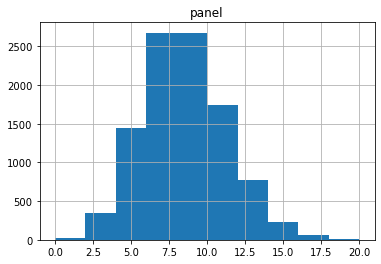

In [52]:
## Run the same simulation 10000 times
data1 = []
for i in range(10000):
    jury = simulateJuryPanel()
    d = {"panel": jury}
    data1.append(d)
df2 =  pd.DataFrame(data1)

df2.hist()

## Create your histogram here

In [53]:
## == TEST CASES for Puzzle 1.7 Part 1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(len(df2) == 10000), "Make sure you do 10,000 simulations."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


#### Part 2:

Find the mean number of black people on the randomly selected juries.

In [54]:
## Find the mean below

mean2 = df2["panel"].mean()
mean2

8.0164

In [55]:
## == TEST CASES for Puzzle 1.7 Part 2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(mean2 < 8.5), "You did not calculate the mean correctly!"
assert(mean2 > 7.5), "You did not calculate the mean correctly!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.8: Final Reflection

❓ **Individual Reflection Question** ❓ Individual Reflection: How did your results change? What does this tell us about the more simulations you run? 

The mean decreased showing the more simulations you run the more accurate you get to the normal probablity

❓ **Group Discussion Question** ❓ This is an example of how we can use statistics to help us solve real world problems.  Discuss with your group how simulations and data science can be used to help address issues of racism specifically.

❓ **Individual Reflection Question** ❓ Give an example of a way that we can use data science to help address issues of racism.  This can be something you discussed in your group or an example you are interested in.

We can use data science to create simukations to follow the normal distibution curve and show to the public situations like what happened are possible

## Puzzle 1.9: Probability

Lastly, find the probability that we will get 3 or less Black men on the jury using `df2`.  You may want to think back to conditionals- that will help here.

In [62]:
## Find the probability here

probability = df2[df2.panel <= 3]
probability = len(probability)/ len(df2)
probability

0.0374

In [61]:
## == TEST CASES for Puzzle 1.9==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(probability <0.05), "You did not calculate the probability correctly!"
assert(probability > 0), "You did not calculate the probability correctly!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# Puzzle 2: Names and Resumes + Simulation!

This next simulation comes from a study looking at female names.  You can read the fully study here if you’d like: [https://www.nber.org/system/files/working_papers/w9873/w9873.pdf](https://www.nber.org/system/files/working_papers/w9873/w9873.pdf) 

Here’s a summary of what happened: Researchers created a standard resume and sent it out to about 500 different “Help Wanted” ads in Chicago and Boston.  The resumes that they sent were identical, except they changed the names and email addresses to have either a “white sounding” name like Emily or a “black sounding” name like Lakisha, according to the study.  Assuming that a resume has about a 20% chance of getting a call back and half of the resumes had white sounding names and half had black sounding names, let’s do this simulation.  We will simulate the results and then look at what actually happened.

## Puzzle 2.1: Initial Thoughts

❓ **Group Discussion Question** ❓ Before we start coding, let’s think about this.  When this study was done in real life, the white sounding names had 10.33% callbacks and the black sounding names had 6.87% callbacks.  Some of the companies claimed this difference was due to chance.  Do you think this is a significant difference? Why do you think this happened? Why or why not is this problematic?

❓ **Individual Reflection Question** ❓ Write down something that surprised you from your group discussion.

I dont think this could be because of chance. It is problematic because it makes it harder for people of color to get a job just because their name isnt white

Let’s do a simulation in Python to understand what’s going on.  We wrote most of the function for you below!  Since the content of the resumes are identical, we should expect to get an equal number of call backs for both types of names.  In other words, picking the callbacks should be like random sampling.  Next, we wrote a simulation to randomly sample 20% of 500 resumes 10,000 times.  Half of the 500 resumes are represented as 0s (representing white sounding names) and half of the resumes are represented as 1s (representing black sounding names).   

## Puzzle 2.2: Load in the data

We have a dataframe called `resumes.csv` that contains 500 rows. Half are 0s (representing white sounding names) and half are 1s (representing black sounding names). Load this data into a dataframe called df3.

In [64]:
## read in the data into a dataframe called df3
df3 = pd.read_csv("resumes.csv")
df3

Resumes
0          0
1          0
2          0
3          0
4          0
..       ...
495        1
496        1
497        1
498        1
499        1

[500 rows x 1 columns]

## Puzzle 2.3: Complete the function

Below is a function that samples 20% of the 500 rows and counts the numbers of 1s and 0s. Fill in the second line of code in this function to random sample 20% of df3 and store the results in a dataframe called df4. Make sure to run the cell after filling in the code. 

In [68]:
def simulateResumes():
    df4 = df3.sample(frac=.2) ## fill in the line of code that randomly samples 20% of df3 and stores the results in df4
    black_sounding = df4[df4.Resumes == 1].count().values
    white_sounding = df4[df4.Resumes == 0].count().values
    return [black_sounding[0], white_sounding[0]]
    
SimResult=simulateResumes()

In [69]:
## == TEST CASES for Puzzle 2.3==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(sum(SimResult) == 100), "Your function does not return the correct number of resumes."


## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## **Read This :)**

Here we are simulating randomly picking 20% of the 500 resumes and doing this 10,000 times! Each time, the 20% that we sample represent the resumes that got callbacks. We are then creating a dataframe (called df5) that contains the number of black sounding names and white sound names. Run the next cell to do this!

In [70]:
data = []
for i in range(10000):  # Simulate 10000 times
  result=simulateResumes()
  data.append( { 'black_sounding': result[0], 'white_sounding': result[1]} )
df5 = pd.DataFrame(data)

## Puzzle 2.4: Calculating the Average Percent

Calculate the average percent of resumes that got callbacks for each group of names in the simulation (these should be close to 10% for each group of names).

Part 1: Calculate the average percent of resumes with black sounding names that got callbacks.  Make sure you are calculating the average **percent**, not just the average!

Part 2: Calculate the average percent of resumes with white sounding names that got callbacks.  Make sure you are calculating the average **percent**, not just the average!

In [71]:
## Part 1- Average Percent for black sounding names (out of 500)

average_percent1 = df5["black_sounding"].mean()/500


average_percent1

0.10001120000000001

In [72]:
## == TEST CASES for Puzzle 2.4 Part 1==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(average_percent1 < 0.11), "You did not calculate the probability correctly!"
assert(average_percent1 > 0.085), "You did not calculate the probability correctly!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


In [73]:
## Part 1- Average Percent for white sounding names (out of 500)

average_percent2 = df5["white_sounding"].mean()/500

average_percent2

0.0999888

In [74]:
## == TEST CASES for Puzzle 2.4 Part 2==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.

assert(average_percent2 < 0.11), "You did not calculate the probability correctly!"
assert(average_percent2 > 0.085), "You did not calculate the probability correctly!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.5: ❓ **Individual Reflection Question** ❓

Think about how these percentages compare to the actual percentages (10.33% vs. 6.87%).  What does this say about discrimination based on your name.

***Double click this cell and type your response here.***

Employers get biased by name alone

## Puzzle 3: Beyond STAT107

❓ **Group Discussion Question** ❓ The Smith trial happened in 1993 and the name study occurred in the early 2000s.  Discuss with you group whether or not you think similar events still occur today and why. Reflect on how data science can be used to educate people about this.

❓ **Individual Reflection Question** ❓ Think about your takeaways from doing these simulations in this lab.  Choose one of the following prompts to write a paragraph style response (5+ sentences) explaining what the simulation showed in either Puzzle 1 or Puzzle 2. 

**Option 1**: Puzzle 1- Pretend that you are a defense attorney and a data scientist. Write a memo to the Supreme Court positioning yourself as a data scientist arguing whether or not your think the jury with 3 black men was randomly selected. Justify your decision and include guidelines for the future.

**Option 2**: Puzzle 2- Pretend that you are a data scientist arguing whether or not there was discrimination based on how applicants’ names sound. Write a memo to the HR Department of one of the companies positioning yourself as a data scientist arguing whether or employers are biased against certain names. Justify your decision using what you’ve already done and include guidelines for the future.


Remember, you only need to do either Option 1 or Option 2 (not both)!

Unfortunaly I do think events like this happen today. I think data science and stats can highloght these issues so that they dont happen again. 


Option 2
Hi HR Committee. I just did a project where I applied to your job 2 times with 2 identical resumes apart from the names. 1 resume had a white sounding name and the other resume had a black sounding name. The problem that I want to highlight is that the white sounding name resume got a call back while the black sounding name did not get a callback. I find this highly discriminatory and I think this could hurt your companies reputation

Best
Jai

# POST-LAB SURVEY

Remember, we are doing a pre and post lab survey this week! Please complete this survey AFTER you finish the lab to get +2 additional extra credit points! This will also help us make the labs better and should take about 10 minutes :) Click the link below to access the survey.

[https://forms.gle/wfudxYa5sCKc1pvx6](https://forms.gle/wfudxYa5sCKc1pvx6)

## Submit Your Work!

You're almost done -- congratulations!

You need to do two more things:

1.  Save your work. To do this, go to File -> Save All

2.  After you have saved, exit this notebook and follow the webpage instructions to commit this lab to your Git repository!